In [5]:
pip install kats

  Using cached kats-0.2.0-py3-none-any.whl (612 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached ax_platform-0.2.4-py3-none-any.whl (950 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-5k1q2j0y\\fbprophet_e6fa1aa0897440caad1ddd31389b4411\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-5k1q2j0y\\fbprophet_e6fa1aa0897440caad1ddd31389b4411\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-o1s51x80'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-5k1q2j0y\fbprophet_e6fa1aa0897440caad1ddd31389b4411\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL

In [8]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install gcc

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - gcc

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
conda install -c conda-forge fbprophet

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa244fe_0         1.0 MB  conda-forge
    convertdate-2.4.0          |     pyhd8ed1ab_0          38 KB  conda-forge
    ephem-4.1.3                |   py38h294d835_4         1.3 MB  conda-forge
    fbprophet-0.7.1            |   py38h7ae7562_0         572 KB  conda-forge
    hijri-converter-2.2.3      |     pyhd8ed1ab_0          17 KB  conda-forge
    holidays-0.13              |     pyhd8ed1ab_0          85 KB  conda-forge
    korean_lu



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [11]:
pip install kats

  Using cached kats-0.2.0-py3-none-any.whl (612 kB)
  Using cached ax_platform-0.2.4-py3-none-any.whl (950 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [86]:
df=pd.read_excel("Vasundi book 1.xlsx")

In [87]:
df.shape

(36, 3)

In [88]:
df.drop(["sales"],axis=1,inplace=True)

In [91]:
df.tail()

,Corrected sales
date,
2021-08-01,154350.0
2021-09-01,145870.0
2021-10-01,156870.0
2021-11-01,148970.0
2021-12-01,143240.0


In [12]:
from datetime import datetime
from datetime import timedelta

In [90]:

df.set_index("date", inplace=True)

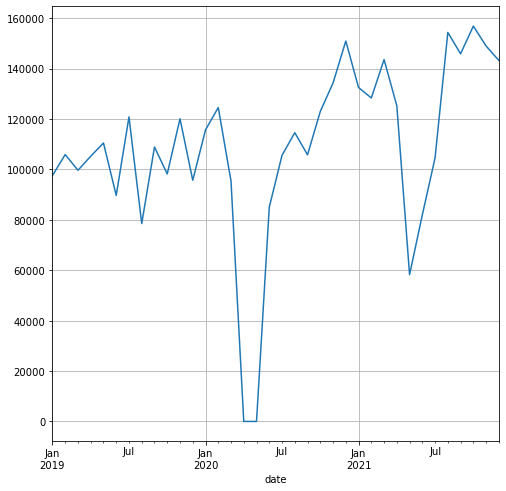

In [19]:
plt.figure(figsize=(8,8))
df["sales"].plot(grid=True)
plt.show()

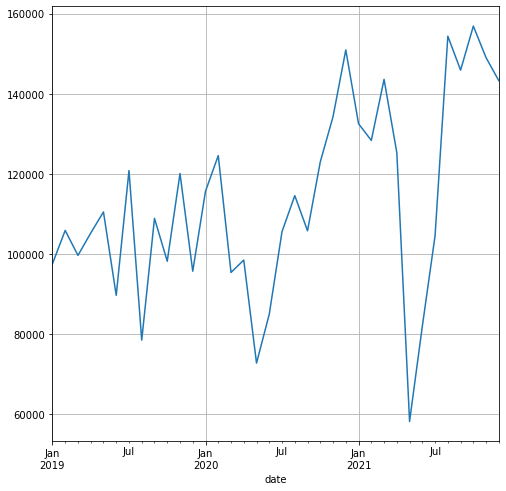

In [20]:
plt.figure(figsize=(8,8))
df["Corrected sales"].plot(grid=True)
plt.show()

In [21]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [22]:
adfuller(df["Corrected sales"])

(-2.979309520946383,
 0.03687233099053504,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 572.2961350405284)

In [92]:
df['log']=np.log(df["Corrected sales"])

In [25]:
adfuller(df["log"])

(-3.33898880289544,
 0.013223120149217109,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -3.764003800096056)

In [35]:
df['MA1']=df["Corrected sales"].rolling(12).mean()
df["MA2"]=df['Corrected sales'].rolling(12).std()

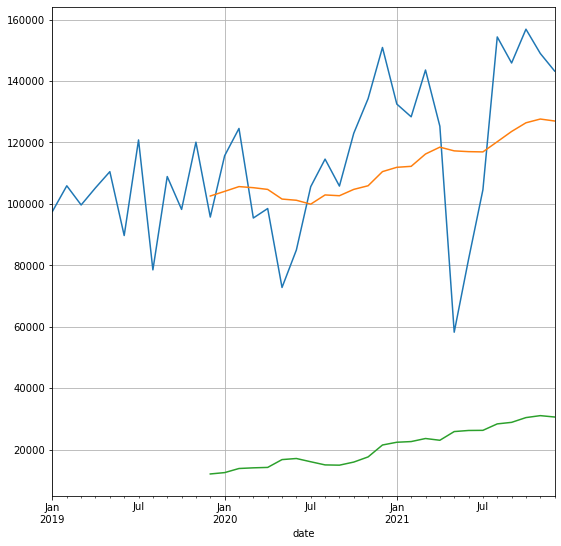

In [39]:
plt.figure(figsize=(9,9))
df["Corrected sales"].plot(grid=True)
df["MA1"].plot(grid=True)
df["MA2"].plot(grid=True)
plt.show()

In [96]:
df["1st difference"]=df["log"].diff()

In [97]:
df1=df.dropna(axis=0)

In [98]:
df1.shape

(35, 4)

In [102]:
adfuller(df1["1st difference"])

(-3.6832058731989434,
 0.004355676600778309,
 10,
 24,
 {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 1.8359630239781168)

<AxesSubplot:xlabel='date'>

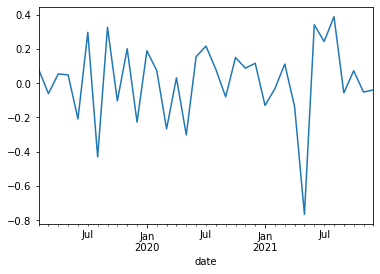

In [105]:
df1["1st difference"].plot()

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

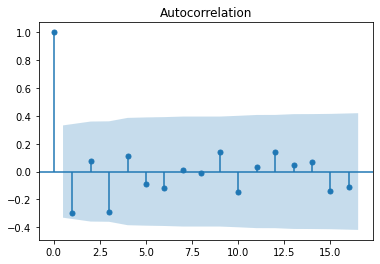

In [107]:
plot_acf(df1["1st difference"])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


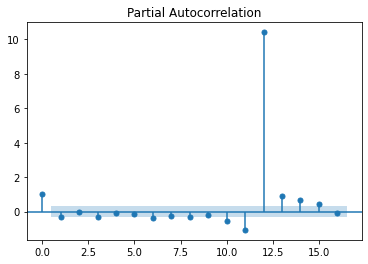

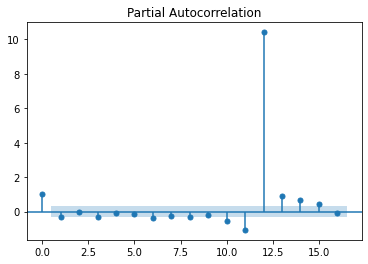

In [110]:
plot_pacf(df1["1st difference"])

In [61]:
from statsmodels.tsa.arima_model import ARMA
import itertools

In [202]:
p=q=range(0,8)
pq=list(itertools.product(p,q))
list1=[]
list2=[]
for order in pq:
    try:
        model=ARMA(df1["1st difference"],order=order)
        model_fit=model.fit()
        list1.append(order)
        list2.append(model_fit.aic)
    except: 
        continue

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [203]:
dlist1=pd.DataFrame(list1)
dlist1.rename(columns={0:"p",1:"q"},inplace=True)
dlist2=pd.DataFrame(list2)
dlist2.rename(columns={0:"Aic"},inplace=True)
table=pd.concat([dlist1,dlist2],axis=1)

In [204]:
table

,p,q,Aic
0,0,0,0.396357
1,0,1,-1.272130
2,0,2,-4.063422
3,0,3,-5.660011
4,0,4,-4.231172
5,0,5,-3.403078
6,0,6,-1.359557
7,0,7,-0.013174
8,1,0,-0.720549
9,1,1,-5.611408


In [205]:
table["Aic"].min()

-6.690046701134847

In [206]:
data=table.query("Aic==Aic.min()")

In [207]:
data

,p,q,Aic
21,3,2,-6.690047


In [208]:
model1=ARMA(df1["1st difference"],order=(3,2))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [209]:
model1_fit=model1.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [210]:
pred=model1_fit.predict(start='2019-02-01',end='2021-12-01')

<AxesSubplot:xlabel='date'>

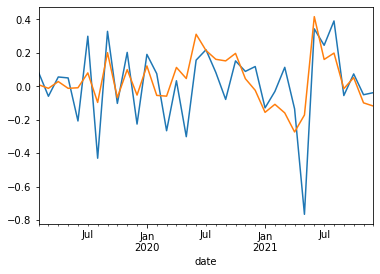

In [211]:
df1["1st difference"].plot()
pred.plot()

In [212]:
pr=model1_fit.predict()

In [213]:
pr1=pr.to_frame()

In [214]:
pr2= pr1[0]+df1["log"].shift(1)

In [215]:
pr2

2019-02-01          NaN
2019-03-01    11.556721
2019-04-01    11.536450
2019-05-01    11.550523
2019-06-01    11.602667
2019-07-01    11.482965
2019-08-01    11.604396
2019-09-01    11.470714
2019-10-01    11.529216
2019-11-01    11.593190
2019-12-01    11.642249
2020-01-01    11.589741
2020-02-01    11.602824
2020-03-01    11.672345
2020-04-01    11.577329
2020-05-01    11.542991
2020-06-01    11.505076
2020-07-01    11.563290
2020-08-01    11.727469
2020-09-01    11.799460
2020-10-01    11.764729
2020-11-01    11.764184
2020-12-01    11.782555
2021-01-01    11.767627
2021-02-01    11.685408
2021-03-01    11.602290
2021-04-01    11.600400
2021-05-01    11.565644
2021-06-01    11.387088
2021-07-01    11.473266
2021-08-01    11.755001
2021-09-01    11.931581
2021-10-01    11.941138
2021-11-01    11.863090
2021-12-01    11.792066
Freq: MS, dtype: float64

In [216]:
pr3=np.exp(pr2)

In [217]:
pr3

2019-02-01              NaN
2019-03-01    104476.848775
2019-04-01    102380.300284
2019-05-01    103831.325224
2019-06-01    109389.197932
2019-07-01     97048.423901
2019-08-01    109578.474630
2019-09-01     95866.666435
2019-10-01    101642.423075
2019-11-01    108357.359701
2019-12-01    113805.868900
2020-01-01    107984.265992
2020-02-01    109406.280679
2020-03-01    117282.939664
2020-04-01    106652.316015
2020-05-01    103052.248561
2020-06-01     99218.103159
2020-07-01    105165.488277
2020-08-01    123929.656384
2020-09-01    133180.370711
2020-10-01    128634.362979
2020-11-01    128564.291401
2020-12-01    130947.982610
2021-01-01    129007.604388
2021-02-01    118825.134164
2021-03-01    109347.905407
2021-04-01    109141.433211
2021-05-01    105413.250101
2021-06-01     88175.778694
2021-07-01     96111.642802
2021-08-01    127389.083582
2021-09-01    151991.723943
2021-10-01    153451.165106
2021-11-01    141930.166442
2021-12-01    132199.298898
Freq: MS, dtype: flo

In [218]:
from sklearn.metrics import mean_squared_error

In [219]:
MSE=mean_squared_error(df1["Corrected sales"][1:],pr3[1:])

In [220]:
np.sqrt(MSE)

17750.231047299418

In [221]:
df1["Corrected sales"].mean()

113802.16857142857

In [222]:
forecast=model1_fit.predict(start='2022-01-01',end='2022-12-01')

In [223]:
forecast

2022-01-01   -0.161574
2022-02-01   -0.064488
2022-03-01   -0.024264
2022-04-01    0.035929
2022-05-01    0.064061
2022-06-01    0.071296
2022-07-01    0.056533
2022-08-01    0.031611
2022-09-01    0.005960
2022-10-01   -0.012305
2022-11-01   -0.019746
2022-12-01   -0.016915
Freq: MS, dtype: float64

In [224]:
f1=forecast.to_frame()


In [225]:
f1

,0
2022-01-01,-0.161574
2022-02-01,-0.064488
2022-03-01,-0.024264
2022-04-01,0.035929
2022-05-01,0.064061
2022-06-01,0.071296
2022-07-01,0.056533
2022-08-01,0.031611
2022-09-01,0.005960
2022-10-01,-0.012305


In [226]:
f1.rename(columns={0:"1 diff"},inplace=True)


In [227]:
f1

,1 diff
2022-01-01,-0.161574
2022-02-01,-0.064488
2022-03-01,-0.024264
2022-04-01,0.035929
2022-05-01,0.064061
2022-06-01,0.071296
2022-07-01,0.056533
2022-08-01,0.031611
2022-09-01,0.005960
2022-10-01,-0.012305


In [238]:
p=df['log'][-1]


In [239]:
p

11.872276824112369

In [240]:
f1["log"]=np.NaN
f1["log"][0]=p

In [241]:
f1

,1 diff,log,forecasted scaled back values
2022-01-01,-0.161574,11.872277,0.961536
2022-02-01,-0.064488,NaN,0.901485
2022-03-01,-0.024264,NaN,0.879875
2022-04-01,0.035929,NaN,0.912062
2022-05-01,0.064061,NaN,0.972402
2022-06-01,0.071296,NaN,1.044262
2022-07-01,0.056533,NaN,1.104997
2022-08-01,0.031611,NaN,1.140485
2022-09-01,0.005960,NaN,1.147302
2022-10-01,-0.012305,NaN,1.133271


In [244]:
for i in range(1,12):
    f1["log"][i]= f1["log"][i-1]+f1["1 diff"][i]

In [245]:
f1["forecasted scaled back values"]=np.exp(f1["log"])

In [246]:
f1

,1 diff,log,forecasted scaled back values
2022-01-01,-0.161574,11.872277,143240.000000
2022-02-01,-0.064488,11.807789,134294.266407
2022-03-01,-0.024264,11.783524,131074.925452
2022-04-01,0.035929,11.819453,135869.883005
2022-05-01,0.064061,11.883514,144858.753729
2022-06-01,0.071296,11.954810,155563.679646
2022-07-01,0.056533,12.011343,164611.472409
2022-08-01,0.031611,12.042954,169898.094775
2022-09-01,0.005960,12.048914,170913.630738
2022-10-01,-0.012305,12.036608,168823.392187


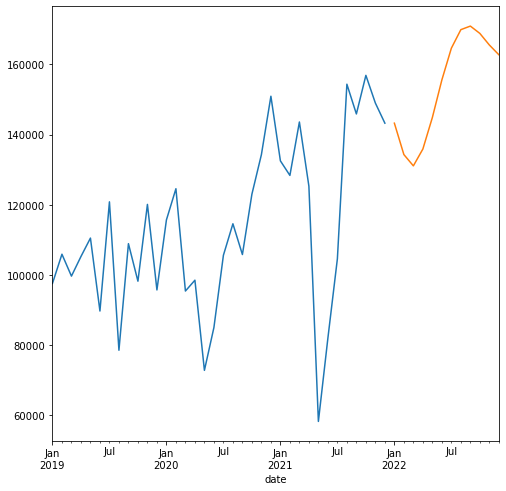

In [248]:
plt.figure(figsize=(8,8))
df["Corrected sales"].plot()
f1["forecasted scaled back values"].plot()
plt.show()